In [1]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import os
import random
import optuna
import plotly
import joblib

from functions.parse_data import synth_dataloader
from multivariate_quantile_regression.network_model import QuantileNetwork

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from cot_train.utils import MLP5

2024-05-06 07:21:38.189851: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 07:21:38.224540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 07:21:38.224561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 07:21:38.225493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 07:21:38.231462: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#Load study
study = joblib.load("optuna/fullstudy.pkl")

In [3]:
trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.005549696641418411
Best hyperparameters: {'hidd_n_layers': 3, 'n_nodes': 250, 'lr': 0.0024925507127947035}


In [24]:
#Remove outliers
threshold = 0.0059
trials = study.trials
plotted_study = optuna.create_study()
for trial in trials:
    if trial.value < threshold:
        plotted_study.add_trial(trial)

[I 2024-05-06 07:38:35,925] A new study created in memory with name: no-name-3ecde2de-b01f-46a7-b839-71e9fcd5ebc4


/tmp/ipykernel_139334/3287897927.py:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(plotted_study,target_name='MSE')


array([<Axes: xlabel='hidd_n_layers', ylabel='MSE'>, <Axes: xlabel='lr'>,
       <Axes: xlabel='n_nodes'>], dtype=object)

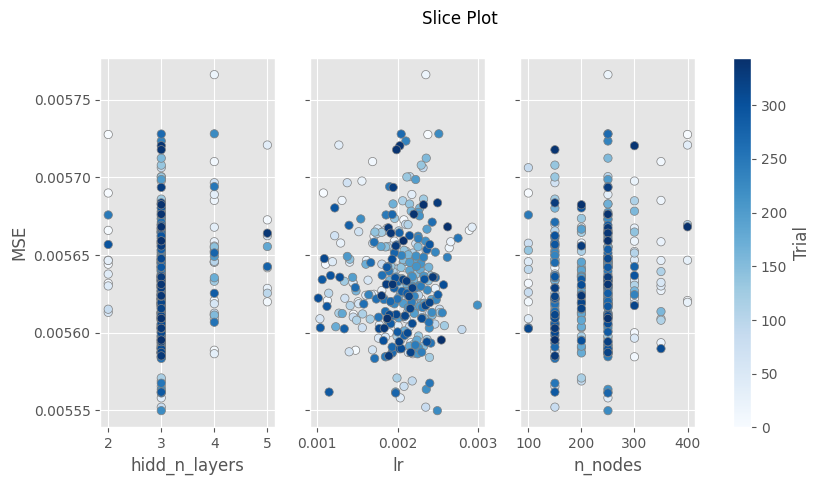

In [25]:
optuna.visualization.matplotlib.plot_slice(plotted_study,target_name='MSE')

/tmp/ipykernel_139334/2881013142.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(plotted_study,target_name = 'Importance')


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

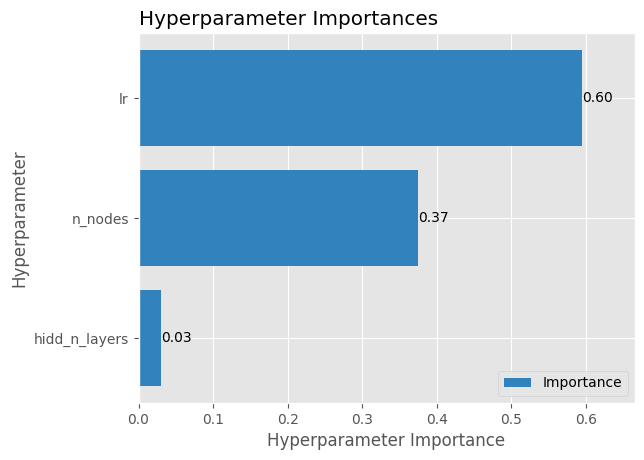

In [6]:
optuna.visualization.matplotlib.plot_param_importances(plotted_study,target_name = 'Importance')

In [7]:
#Remove outliers due to lr
threshold = 10
lr_threshold = 0.005
trials = study.trials
plotted_study_1 = optuna.create_study()
for trial in trials:
    if trial.value < threshold and trial.params['lr'] < lr_threshold:
        plotted_study_1.add_trial(trial)

[I 2024-05-06 07:21:43,510] A new study created in memory with name: no-name-5bbcf673-48d7-4682-ae46-9d65cfb4394f


/tmp/ipykernel_139334/2795706892.py:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(plotted_study_1,target_name='MSE')


array([<Axes: xlabel='hidd_n_layers', ylabel='MSE'>, <Axes: xlabel='lr'>,
       <Axes: xlabel='n_nodes'>], dtype=object)

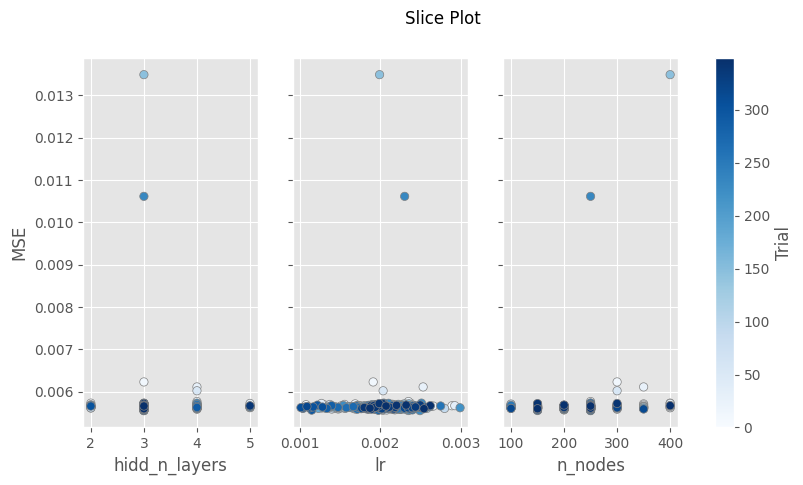

In [8]:
optuna.visualization.matplotlib.plot_slice(plotted_study_1,target_name='MSE')

/tmp/ipykernel_139334/1848706332.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(plotted_study_1,target_name = 'Importance')


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

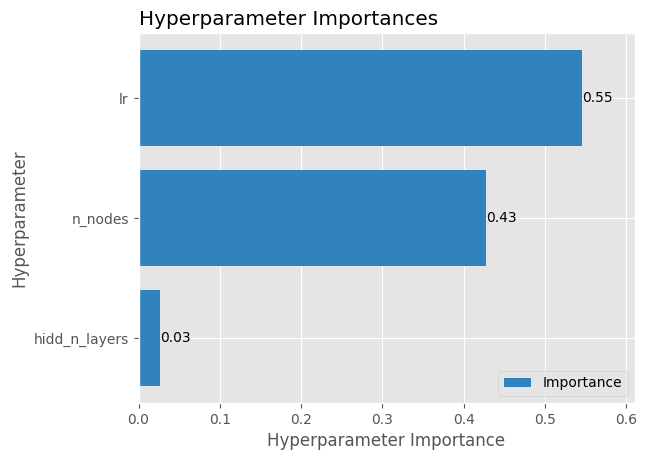

In [9]:
optuna.visualization.matplotlib.plot_param_importances(plotted_study_1,target_name = 'Importance')

In [15]:
print(trials[0].datetime_start)
print(trials[349].datetime_complete)

2024-05-03 09:23:55.394254
2024-05-05 00:05:50.078747


In [ ]:
#Load study
study = joblib.load("optuna/fullstudy2.pkl")

In [ ]:
trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.006664678619281981
Best hyperparameters: {'hidd_n_layers': 3, 'n_nodes': 400, 'lr': 0.002292007658243276}


In [ ]:
#Remove outliers
threshold = 0.01
trials = study.trials
plotted_study = optuna.create_study()
for trial in trials:
    if trial.value < threshold:
        plotted_study.add_trial(trial)

[I 2024-04-04 14:03:21,281] A new study created in memory with name: no-name-1e175ed0-e424-4edf-b159-ba5115b03455


/tmp/ipykernel_17781/3287897927.py:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(plotted_study,target_name='MSE')


array([<Axes: xlabel='hidd_n_layers', ylabel='MSE'>, <Axes: xlabel='lr'>,
       <Axes: xlabel='n_nodes'>], dtype=object)

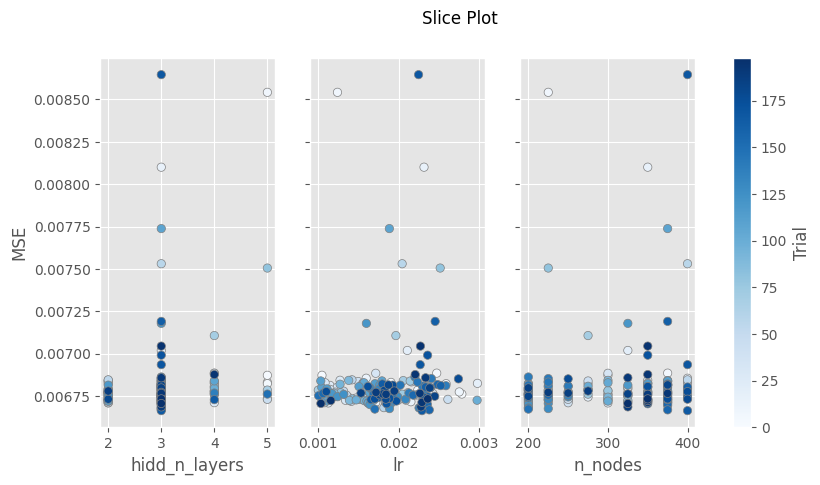

In [ ]:
optuna.visualization.matplotlib.plot_slice(plotted_study,target_name='MSE')

/tmp/ipykernel_17781/2881013142.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(plotted_study,target_name = 'Importance')


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

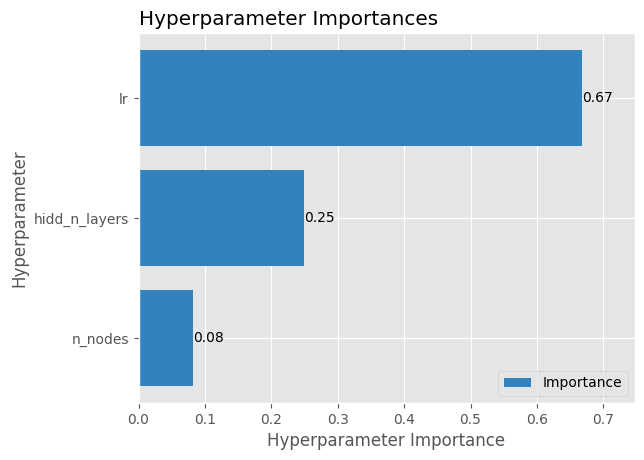

In [ ]:
optuna.visualization.matplotlib.plot_param_importances(plotted_study,target_name = 'Importance')

In [ ]:
df = study.trials_dataframe()
df.head(60)

,number,value,datetime_start,datetime_complete,duration,params_hidd_n_layers,params_lr,params_n_nodes,state
0,0,0.006763,2024-04-03 09:19:19.980162,2024-04-03 09:27:28.055326,0 days 00:08:08.075164,5,0.002788,300,COMPLETE
1,1,0.006730,2024-04-03 09:27:28.055669,2024-04-03 09:33:45.291541,0 days 00:06:17.235872,2,0.001428,300,COMPLETE
2,2,0.006831,2024-04-03 09:33:45.291860,2024-04-03 09:40:26.018858,0 days 00:06:40.726998,5,0.001907,225,COMPLETE
3,3,0.006873,2024-04-03 09:40:26.019189,2024-04-03 09:49:34.566981,0 days 00:09:08.547792,5,0.001048,300,COMPLETE
4,4,0.006785,2024-04-03 09:49:34.567288,2024-04-03 09:59:01.912164,0 days 00:09:27.344876,3,0.002239,225,COMPLETE
5,5,0.006824,2024-04-03 09:59:01.912489,2024-04-03 10:06:03.394299,0 days 00:07:01.481810,5,0.002592,275,COMPLETE
6,6,0.006886,2024-04-03 10:06:03.394605,2024-04-03 10:12:12.387275,0 days 00:06:08.992670,4,0.002475,375,COMPLETE
7,7,0.008542,2024-04-03 10:12:12.387584,2024-04-03 10:22:24.727460,0 days 00:10:12.339876,5,0.001241,225,COMPLETE
8,8,0.006735,2024-04-03 10:22:24.727764,2024-04-03 10:33:38.658205,0 days 00:11:13.930441,5,0.001452,200,COMPLETE
9,9,0.006775,2024-04-03 10:33:38.658512,2024-04-03 10:42:09.918924,0 days 00:08:31.260412,2,0.002756,225,COMPLETE


In [ ]:
layers = np.array([2,3,4,5])
nodes = np.array([200,225,250,275,300,325,350,375,400])

for l in layers:
    median = np.median(df.loc[df['params_hidd_n_layers']==l,'value'])
    print('For '+str(l)+' hidden layers, the median MSE is: '+str(median))

for n in nodes:
    median = np.median(df.loc[df['params_n_nodes']==n,'value'])
    print('For '+str(n)+' nodes, the median MSE is: '+str(median))

For 2 hidden layers, the median MSE is: 0.006766259960162406
For 3 hidden layers, the median MSE is: 0.006766383585323937
For 4 hidden layers, the median MSE is: 0.006799310730832185
For 5 hidden layers, the median MSE is: 0.006805033708556231
For 200 nodes, the median MSE is: 0.0067624037319548025
For 225 nodes, the median MSE is: 0.006773816117297892
For 250 nodes, the median MSE is: 0.006767878594214205
For 275 nodes, the median MSE is: 0.006789782376700881
For 300 nodes, the median MSE is: 0.006759676746816563
For 325 nodes, the median MSE is: 0.006764691021920014
For 350 nodes, the median MSE is: 0.0067733060215343305
For 375 nodes, the median MSE is: 0.006768786046428558
For 400 nodes, the median MSE is: 0.006797197394370766


In [ ]:
lr_lims = np.linspace(0.001,0.003,21)
MSE_lr_bins = np.zeros(len(lr_lims)-1)
count_lr_bins = np.zeros(len(lr_lims)-1)
for i in range(df.shape[0]):
    for j in range(len(MSE_lr_bins)):
        if df.loc[i,'params_lr']>=lr_lims[j] and df.loc[i,'params_lr']<lr_lims[j+1]:
            MSE_lr_bins[j]=MSE_lr_bins[j]+df.loc[i,'value']
            count_lr_bins[j]=count_lr_bins[j]+1

MSE_means = MSE_lr_bins/count_lr_bins
print(MSE_means)

[0.00677139 0.00676164 0.00704311 0.00676239 0.00675846 0.00679186
 0.00678164 0.0067796  0.00678528 0.00678933 0.00862752 0.00680792
 0.0069216  0.00688672 0.0068721  0.0069885  0.00673139 0.00679667
        nan 0.00677588]


/tmp/ipykernel_20700/2072041877.py:10: RuntimeWarning: invalid value encountered in divide
  MSE_means = MSE_lr_bins/count_lr_bins


In [ ]:
df.loc[0,'value']

0.006762732642864186